# Porównanie struktur QuadTree i KdTree

In [1]:
import quad_tree
import quad_tree_vis
import kd_tree
import kd_tree_visualiser
from Point import Point
from Rectangle import Rectangle
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import tests.generate_tests as gt

## Testy poprawności implementacji:

In [2]:
# umieścić testy poprawności

## Porównanie wydajnościowe struktur QuadTree i KdTree

In [2]:

# Zwiększ szerokość wyświetlanych kolumn
pd.set_option('display.max_columns', None)  # Zwiększa liczbę wyświetlanych kolumn
pd.set_option('display.width', 1000)

Funkcje pomocnicze

In [17]:
import pandas as pd
from time import time

def measure_time(function, *args, **kwargs):
    """Pomocnicza funkcja do mierzenia czasu wykonania."""
    start = time()
    result = function(*args, **kwargs)
    end = time()
    return result, end - start

def show_time_table(test_set, rectangle = Rectangle(Point((30,30)), Point((70,70))), output_file=None, title="Benchmark"):
    """
    Wyświetla tabelę z czasami budowy i wyszukiwania dla KDTree i QuadTree,
    z opcją zapisu do pliku CSV.
    
    Args:
        test_set (list): Lista zbiorów testowych.
        rectangle: Prostokąt do wyszukiwania.
        output_file (str, optional): Ścieżka do pliku CSV, gdzie tabela zostanie zapisana.
        title (str): Tytuł tabeli.
    """
    build_times = []
    search_times = []
    sizes = []

    for zbior_test in test_set:
        liczba_punktow = len(zbior_test)
        sizes.append(liczba_punktow)

        # Mierzenie czasu dla KDTree
        kdtree, build_kd_time = measure_time(kd_tree.KdTree, zbior_test, len(zbior_test[0]))
        _, search_kd_time = measure_time(kdtree.find_points_in_region, rectangle)

        # Mierzenie czasu dla QuadTree
        Q_tree, build_qt_time = measure_time(quad_tree.build_quadtree, zbior_test)
        _, search_qt_time = measure_time(Q_tree.search, rectangle, [])

        # Dodanie wyników
        build_times.append([build_kd_time, build_qt_time])
        search_times.append([search_kd_time, search_qt_time])

    # Tworzenie DataFrame z zamienionymi kolumnami
    df = pd.DataFrame(
        data={
            "Liczba punktów": sizes,
            "KDTree Build [s]": [bt[0] for bt in build_times],
            "QuadTree Build [s]": [bt[1] for bt in build_times],  
            "KDTree Search [s]": [st[0] for st in search_times],  
            "QuadTree Search [s]": [st[1] for st in search_times],
        }
    )

    # Wyświetlanie tytułu i tabeli
    print(f"\n{title}")
    print(df)

    # Zapis do pliku CSV, jeśli podano ścieżkę
    if output_file:
        df.to_csv(output_file, index=False)
        # print(f"\nTabela została zapisana do pliku: {output_file}")
    return df


In [23]:
import matplotlib.pyplot as plt

def show_graphs(df, title):
    # Tworzenie wykresów w jednym rzędzie, dwóch kolumnach
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
    
    # Tytuł całkowity wykresu
    fig.suptitle(title)
    
    # Pierwszy wykres: Czas konstrukcji
    ax1.set_title("Czas konstrukcji")
    ax1.plot(df["Liczba punktów"], df["KDTree Build [s]"], label="KDTree", marker="o")
    ax1.plot(df["Liczba punktów"], df["QuadTree Build [s]"], label="QuadTree", marker="o")
    ax1.set_xlabel("Liczba punktów")
    ax1.set_ylabel("Czas konstrukcji [s]")
    ax1.legend()
    
    # Drugi wykres: Czas przeszukiwania
    ax2.set_title("Czas przeszukiwania")
    ax2.plot(df["Liczba punktów"], df["KDTree Search [s]"], label="KDTree", marker="o")
    ax2.plot(df["Liczba punktów"], df["QuadTree Search [s]"], label="QuadTree", marker="o")
    ax2.set_xlabel("Liczba punktów")
    ax2.set_ylabel("Czas przeszukiwania [s]")
    ax2.legend()
    
    # Wyświetlanie wykresu
    plt.show()

1. Losowy rozkład punktow


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.099576            0.199106           0.001380             0.002672
1           20000          0.425345            0.387501           0.001921             0.005576
2           30000          0.691474            0.604078           0.002710             0.007875
3           40000          1.220123            0.547502           0.003364             0.010815
4           50000          1.557876            0.675712           0.003840             0.014323
5           60000          1.921165            1.271660           0.004693             0.017384
6           70000          1.849055            1.472510           0.005235             0.019032
7           80000          2.178902            1.710857           0.005592             0.022559
8           90000          2.469130            1.945282           0.006060             0.025522
9          100000          3.

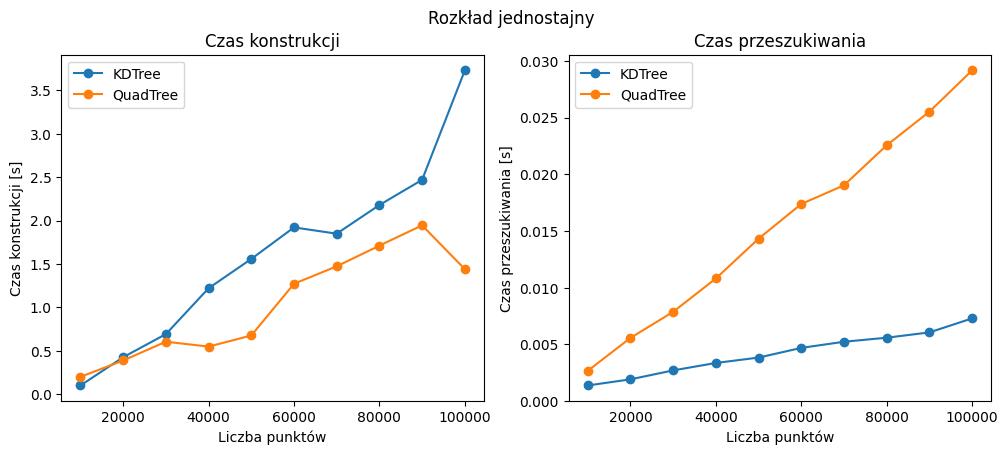

In [24]:
df1 = show_time_table([gt.generate_uniform_distribution(10000*n,0,100,0,100) for n in range(1,11)],output_file="c1.csv")
show_graphs(df1, "Rozkład jednostajny")

2. Rozkład normalny

In [10]:
df2 = show_time_table([gt.generate_standard_distribution(10000*n,50,50,10,10) for n in range(1,11)],output_file="c2.csv")
show_graphs(df2, "Rozkład normalny")


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.131707            0.130297           0.003217             0.013516
1           20000          0.288276            0.407732           0.005864             0.028078
2           30000          0.949550            0.628870           0.007776             0.042350
3           40000          1.094713            0.855670           0.009985             0.059515
4           50000          1.734292            0.688583           0.013631             0.072596
5           60000          2.040948            1.237298           0.016833             0.088343
6           70000          2.024548            1.461391           0.018311             0.101326
7           80000          2.344441            1.804728           0.021391             0.121712
8           90000          3.436959            2.117959           0.027564             0.137374
9          100000          3.

3.1 Dwa skupiska

In [11]:
show_time_table([gt.generate_clasters(10000*n,2,0,100,0,100) for n in range(1,11)])


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.142230            0.134553           0.000071             0.000025
1           20000          0.289077            0.432906           0.000094             0.000041
2           30000          0.773738            0.647160           0.000115             0.000065
3           40000          1.335194            0.610949           0.000103             0.000057
4           50000          1.683117            1.102482           0.000160             0.000061
5           60000          1.745400            1.342651           0.000117             0.000058
6           70000          2.031112            1.605367           0.000124             0.000057
7           80000          2.336327            2.394764           0.000120             0.000047
8           90000          2.728266            2.060942           0.000122             0.000063
9          100000          3.

3.2 Trzy skupiska

In [12]:
show_time_table([gt.generate_clasters(10000*n,3,0,100,0,100) for n in range(1,11)])


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.136940            0.146549           0.000008             0.000003
1           20000          0.392756            0.440702           0.000017             0.000006
2           30000          0.765524            0.869695           0.000100             0.000038
3           40000          1.106984            0.915669           0.000099             0.000040
4           50000          1.396738            1.159316           0.000016             0.000011
5           60000          1.688512            1.821410           0.000100             0.000038
6           70000          2.012814            1.638386           0.000130             0.000052
7           80000          2.363147            1.872883           0.000115             0.000048
8           90000          2.692391            2.133766           0.000109             0.000040
9          100000          3.

3.3 Dwa skupiska z wartościami odstającymi

In [14]:
show_time_table([gt.add_outliners(50, gt.generate_clasters(10000*n,2,0,100,0,100),0,100,0,100) for n in range(1,11)])


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10050          0.177291            0.216889           0.000060             0.000033
1           20050          0.560424            0.450643           0.000077             0.000035
2           30050          0.776615            0.690774           0.000101             0.000057
3           40050          1.072139            0.943710           0.000095             0.000036
4           50050          1.680048            1.095332           0.000099             0.000107
5           60050          1.646453            1.326101           0.000102             0.000058
6           70050          2.512253            1.122716           0.000113             0.000068
7           80050          2.801717            1.303206           0.000114             0.000091
8           90050          3.144278            2.059565           0.000128             0.000083
9          100050          2.

4. Okrąg

In [15]:
show_time_table([gt.generate_random_on_circle(10000*n,70,90) for n in range(1,11)],Rectangle(Point((0,-70)),Point((100,100))))


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.120585            0.114192           0.001022             0.005424
1           20000          0.252542            0.376978           0.002295             0.013007
2           30000          0.899892            0.581692           0.003332             0.020177
3           40000          1.041817            0.783984           0.004133             0.026270
4           50000          1.351269            0.996480           0.006141             0.033575
5           60000          1.639209            1.645433           0.006911             0.040940
6           70000          1.992068            1.461474           0.007758             0.050051
7           80000          2.376327            1.692651           0.009462             0.058592
8           90000          2.625235            1.889999           0.009149             0.065653
9          100000          3.

5. Krzyż

In [4]:
show_time_table([gt.generate_cross_on_axes(10000*n,-100,100,-100,100) for n in range(1,11)],Rectangle(Point((10,-20)),Point((60,30))))


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.188630            0.231288           0.002718             0.002079
1           20000          0.492976            0.500073           0.005358             0.004710
2           30000          0.838850            0.805940           0.008832             0.007118
3           40000          0.991950            1.235231           0.011450             0.009091
4           50000          1.238868            1.268389           0.014212             0.011094
5           60000          1.472101            1.996240           0.017490             0.013525
6           70000          1.759802            1.855322           0.019918             0.015920
7           80000          2.070564            2.584947           0.022826             0.018316
8           90000          2.461945            2.488102           0.024970             0.020566
9          100000          2.

6. Prostokąt

In [5]:
show_time_table([gt.generate_random_points_on_rectangle(10000*n,0,100,0,100) for n in range(1,11)],Rectangle(Point((10,-20)),Point((60,30))))


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.125051            0.145362           0.003195             0.002017
1           20000          0.446161            0.457552           0.006618             0.004501
2           30000          0.915604            0.724884           0.012347             0.006894
3           40000          1.046455            1.002904           0.012562             0.009361
4           50000          1.350797            1.269488           0.015121             0.011768
5           60000          1.636710            2.014867           0.025724             0.014331
6           70000          1.959393            1.963678           0.022849             0.017115
7           80000          2.385053            3.025385           0.035976             0.018464
8           90000          2.769360            2.721501           0.038947             0.021353
9          100000          3.

7. Punkty na lini

In [6]:
show_time_table([gt.generate_random_on_line(10000*n,1,10,0,100,10) for n in range(1,11)],Rectangle(Point((10,10)),Point((60,100))))


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.098058            0.126865           0.002241             0.006742
1           20000          0.399823            0.392089           0.004238             0.015833
2           30000          0.834427            0.377372           0.005260             0.022029
3           40000          1.112695            0.802068           0.007065             0.032033
4           50000          1.184784            1.005113           0.007608             0.040799
5           60000          1.878684            1.231458           0.011346             0.049047
6           70000          1.751714            1.476555           0.010930             0.060339
7           80000          2.024764            2.300527           0.012337             0.073372
8           90000          2.359843            1.941021           0.014657             0.072864
9          100000          2.

8. Siatka

In [4]:
show_time_table([gt.generate_grid_normal(100*n,0,1000,0,1000) for n in range(1,11)],Rectangle(Point((300,300)), Point((700,700))))


Benchmark
   Liczba punktów  KDTree Build [s]  QuadTree Build [s]  KDTree Search [s]  QuadTree Search [s]
0           10000          0.223765            0.241584           0.001042             0.002156
1           40000          0.959818            0.995491           0.001819             0.006977
2           90000          2.231512            1.593273           0.003131             0.016304
3          160000          3.605634            2.772451           0.005511             0.026681
4          250000          5.612103            6.307501           0.006819             0.052902
5          360000          9.206934            7.273028           0.010075             0.062897
6          490000          9.741516           12.389861           0.011178             0.093267
7          640000         13.565809           17.199142           0.015456             0.119449
8          810000         17.200187           21.915602           0.020223             0.156493
9         1000000         21.

## Wizualizacje tworzenia struktur